In [1]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
a = df.loc[:,features]
b = df.loc[:,['target']]

In [4]:
a = pd.DataFrame(a)
x = a.iloc[:,0:3]
y = a.loc[:,['petal width']]

In [5]:
import sklearn
from sklearn import model_selection
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.4, random_state=101)

In [6]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
predict = ln.predict(x_test)

In [20]:
predict = pd.DataFrame(predict)
predict.columns = ['petal width predict']

In [21]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predict)


0.9163018471415174

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predict)

0.14676673444053265

In [23]:
import sklearn.metrics
np.sqrt(sklearn.metrics.mean_squared_error(y_test, predict))

0.19483439485268286

In [24]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, predict) 

0.009486589041488231

In [25]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, predict)

0.09745010630699616

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.9162863020365832

[Text(0,0.5,''), Text(0.5,0,'Predicted vs Orginal')]

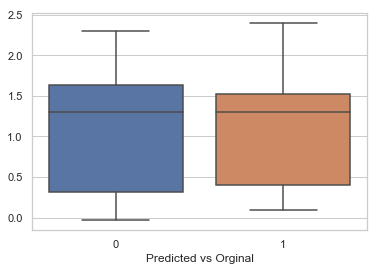

In [29]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(data =[predict,y_test])
ax.set(xlabel='Predicted vs Orginal', ylabel='')

C:\Users\ashwi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


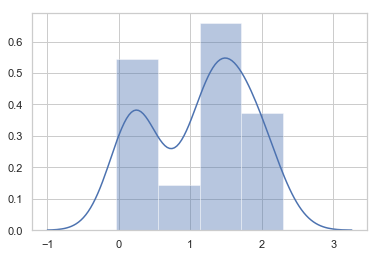

In [30]:
sns.distplot(predict)

C:\Users\ashwi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


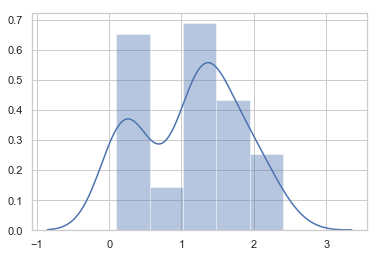

In [31]:
sns.distplot(y_test)